In [1]:
import MDAnalysis as mda
from MDAnalysis.tests.datafiles import PSF, DCD
from MDAnalysis.analysis.rms import RMSD

import molecularnodes as mn
import numpy as np
import bpy
# disable logging
#cycles-print-stats = False
from ggmolvis.ggmolvis import GGMolVis

No MNSession found to load for this .blend file.


# Trajectory Visualization

In [2]:
u = mda.Universe(PSF, DCD)

/Applications/Blender.app/Contents/Resources/4.2/python/lib/python3.11/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


In [3]:
ggmv = GGMolVis()

Creating new GGMolVis


In [4]:
residues_ag = u.select_atoms('resid 127 40')
protein_ag = u.select_atoms('protein')

In [5]:
residue_mol = ggmv.molecule(residues_ag)
protein_mol = ggmv.molecule(protein_ag, style='cartoon')

Read blend: "/Users/scottzhuang/git_rego/MolecularNodes/molecularnodes/assets/template/startup.blend"
Saved: '/var/folders/fn/_k4nj2nd6zv85t7_r3417nb40000gn/T/tmpdyh507tn.png'
Time: 00:07.49 (Saving: 00:00.19)



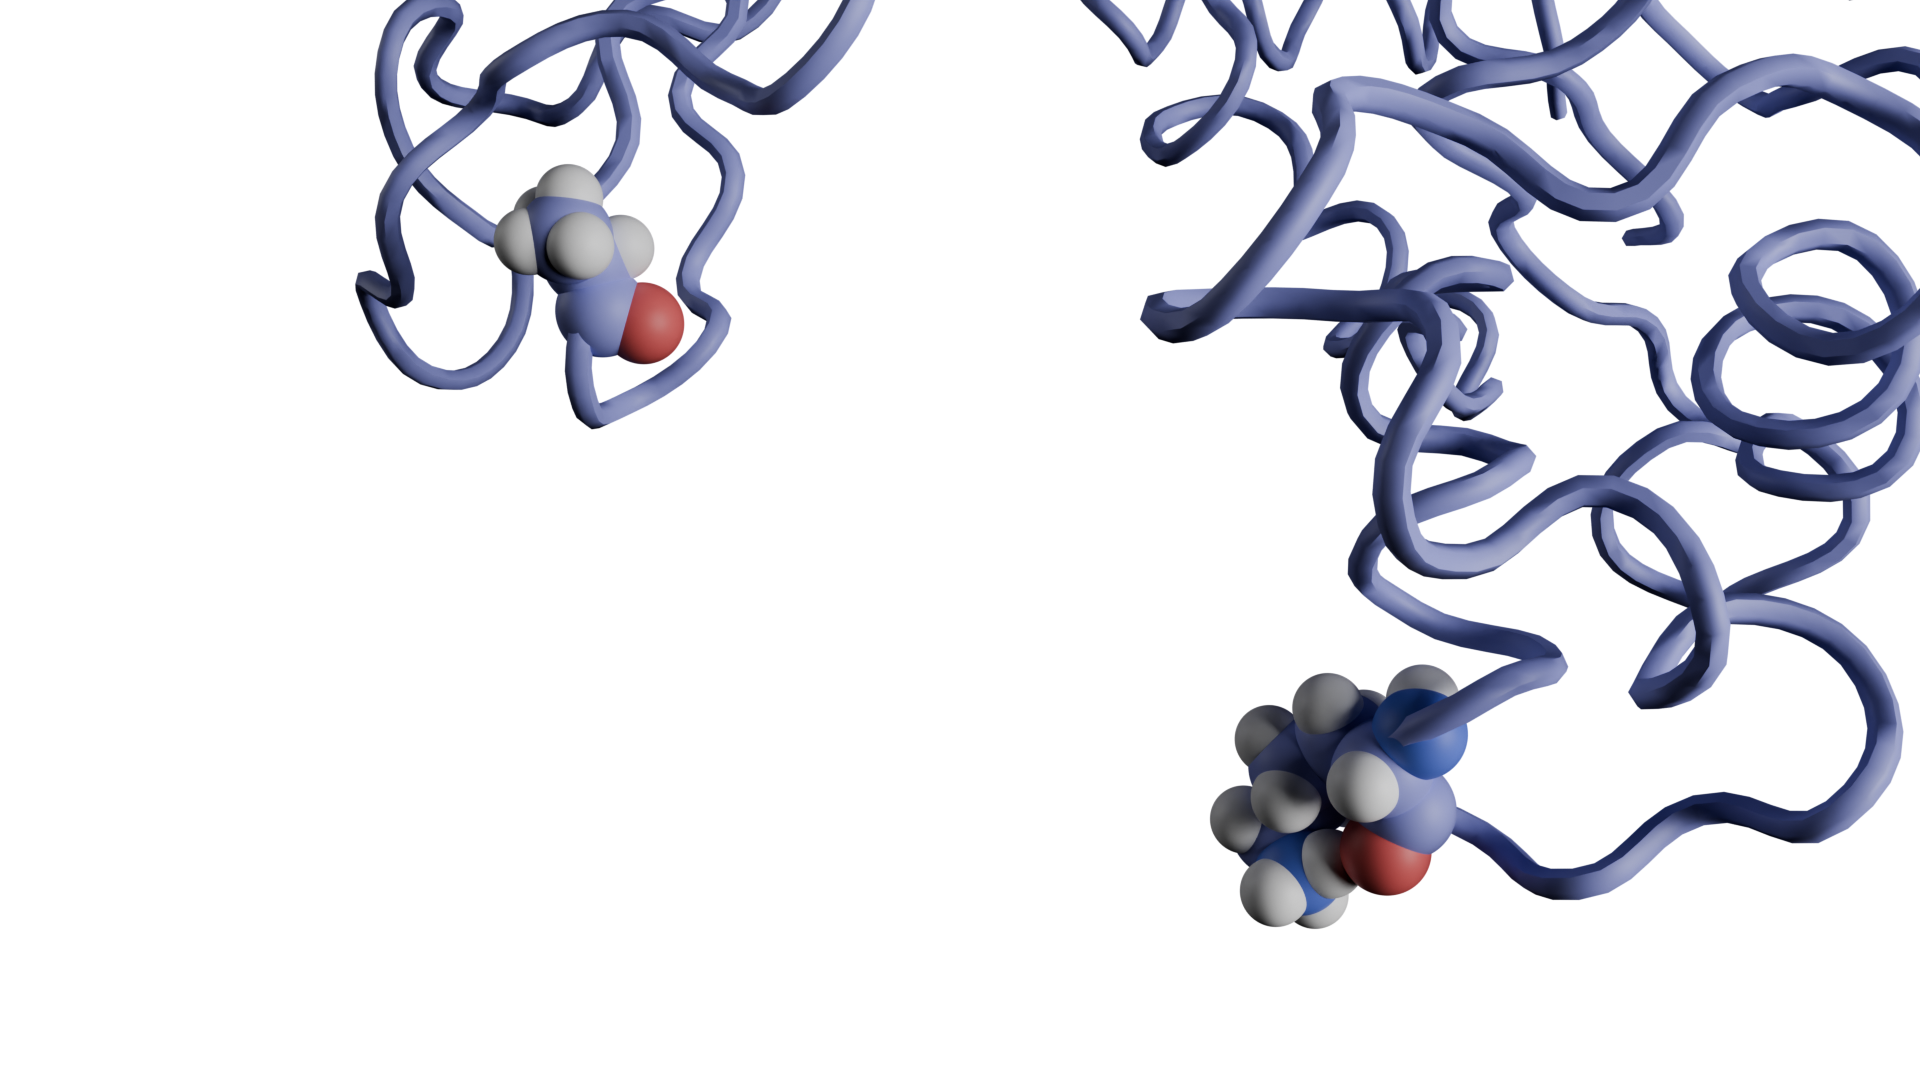

In [6]:
residue_mol.render()

Saved: '/var/folders/fn/_k4nj2nd6zv85t7_r3417nb40000gn/T/tmpfxvu74m4.png'
Time: 00:05.23 (Saving: 00:00.13)



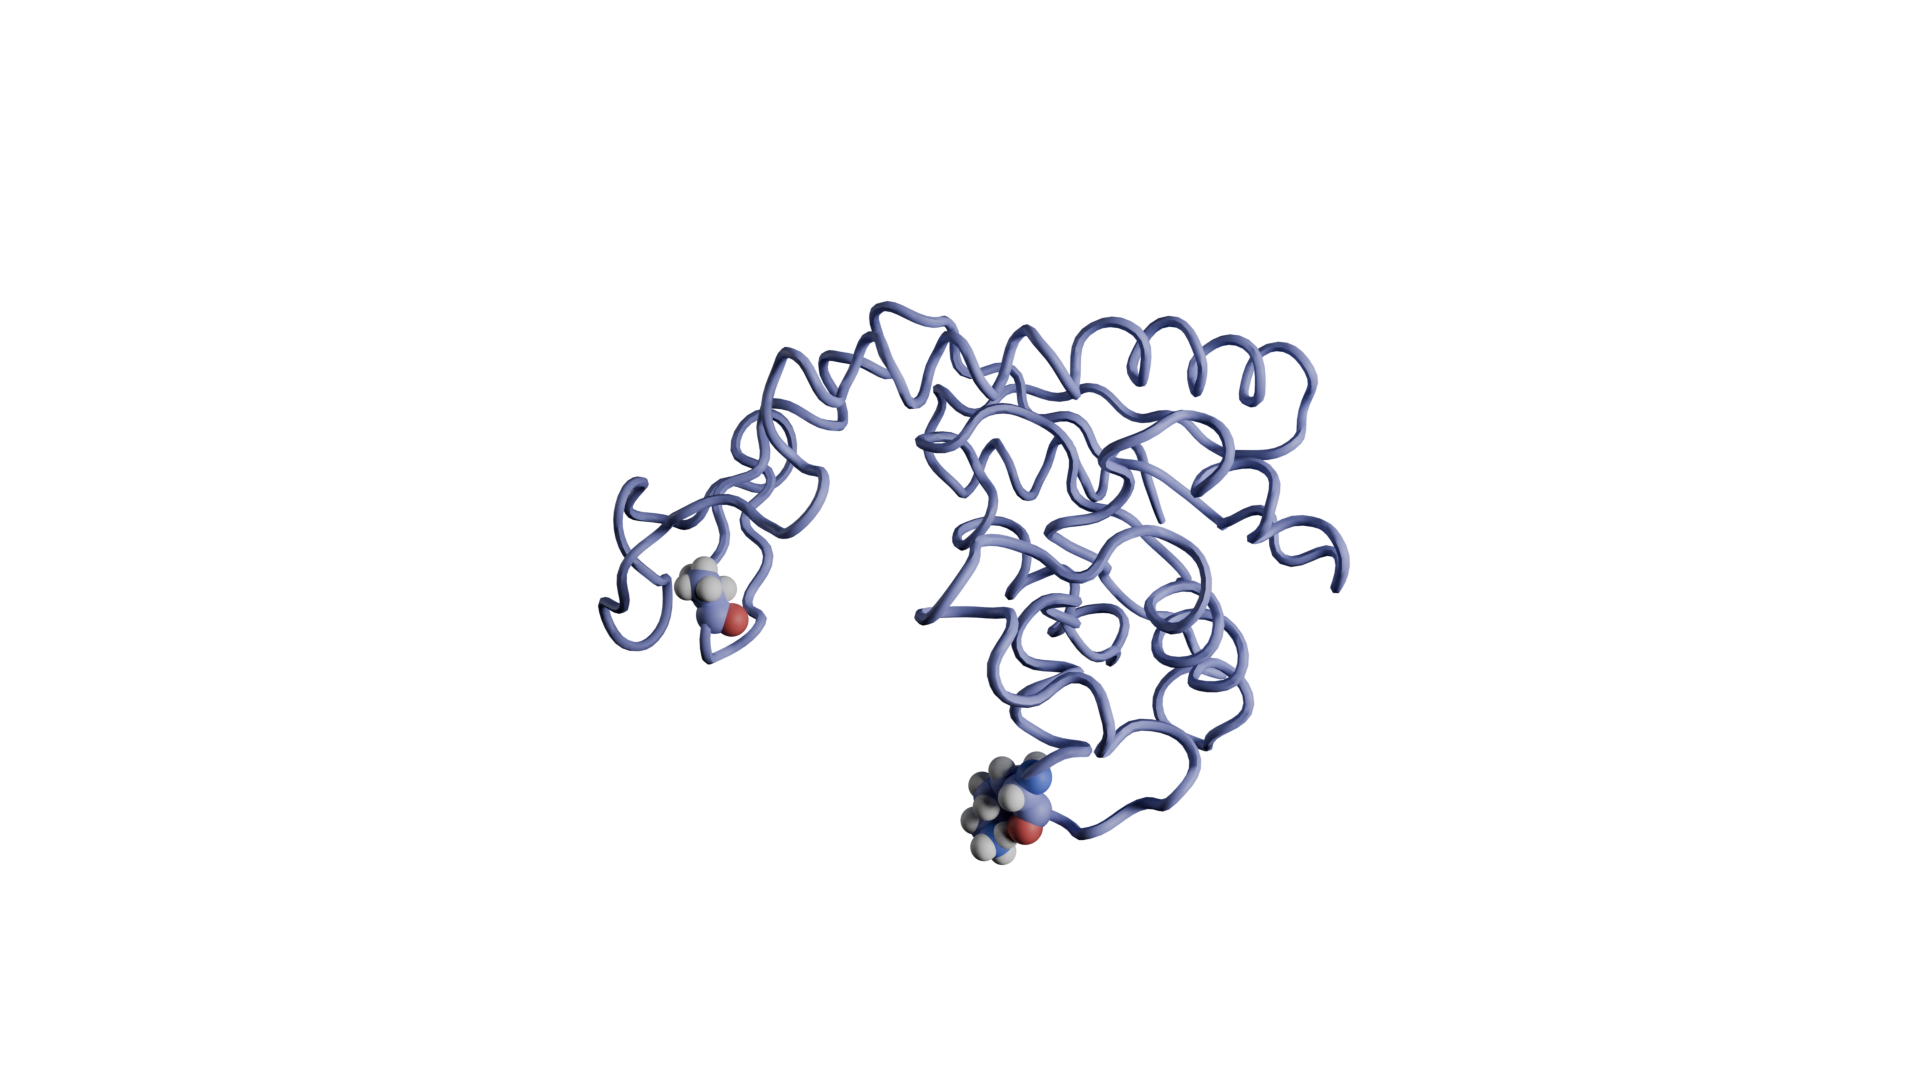

In [7]:
protein_mol.render()

Saved: '/var/folders/fn/_k4nj2nd6zv85t7_r3417nb40000gn/T/tmpab7_mn3x.png'
Time: 00:04.81 (Saving: 00:00.12)



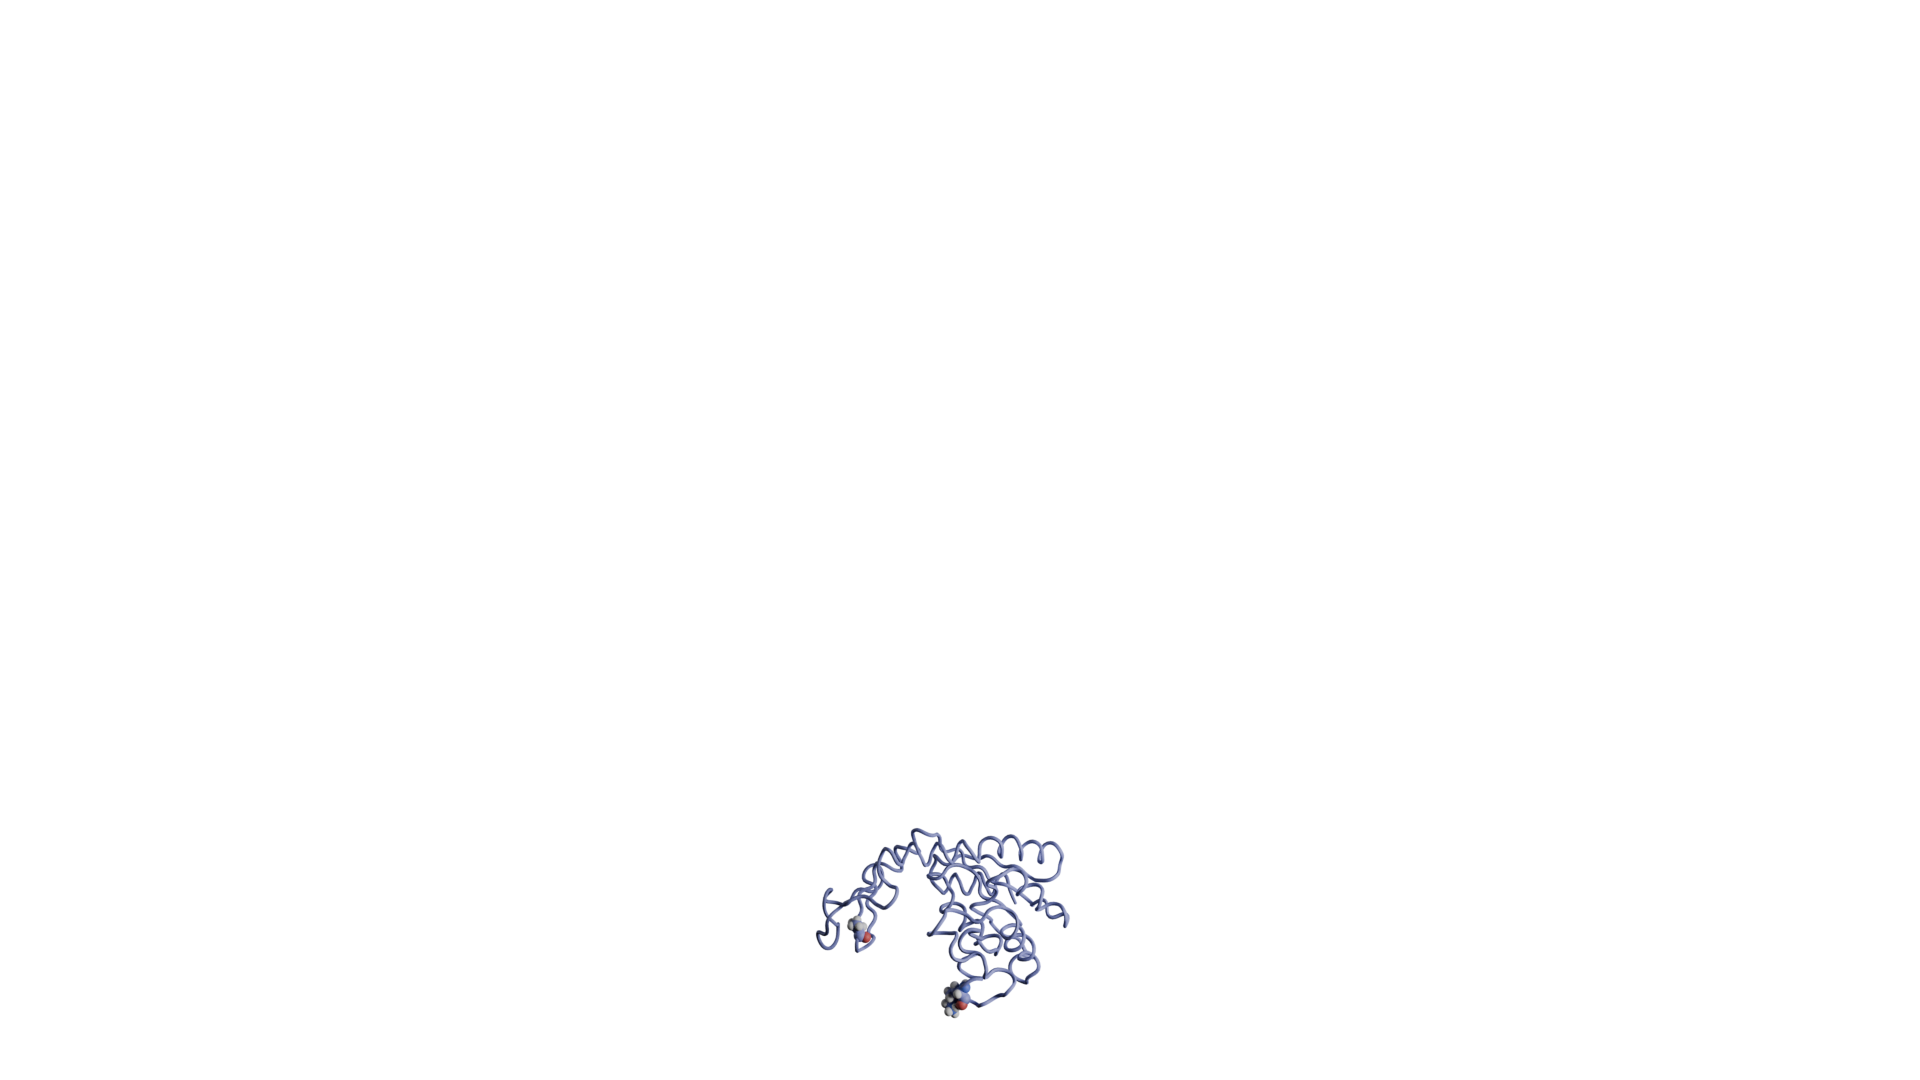

In [8]:
ggmv.global_camera.render()

# Shape Visualization

In [9]:
res_1 = residues_ag.residues[0].atoms
res_2 = residues_ag.residues[1].atoms
line_points = np.asarray([[res_1.center_of_mass(), res_2.center_of_mass()] for ts in u.trajectory])

In [10]:
line_mol = ggmv.line(line_points[:,0], line_points[:,1])

In [11]:
# set frame
bpy.context.scene.frame_set(0)

Saved: '/var/folders/fn/_k4nj2nd6zv85t7_r3417nb40000gn/T/tmpvv10pjoc.png'
Time: 00:07.60 (Saving: 00:00.14)



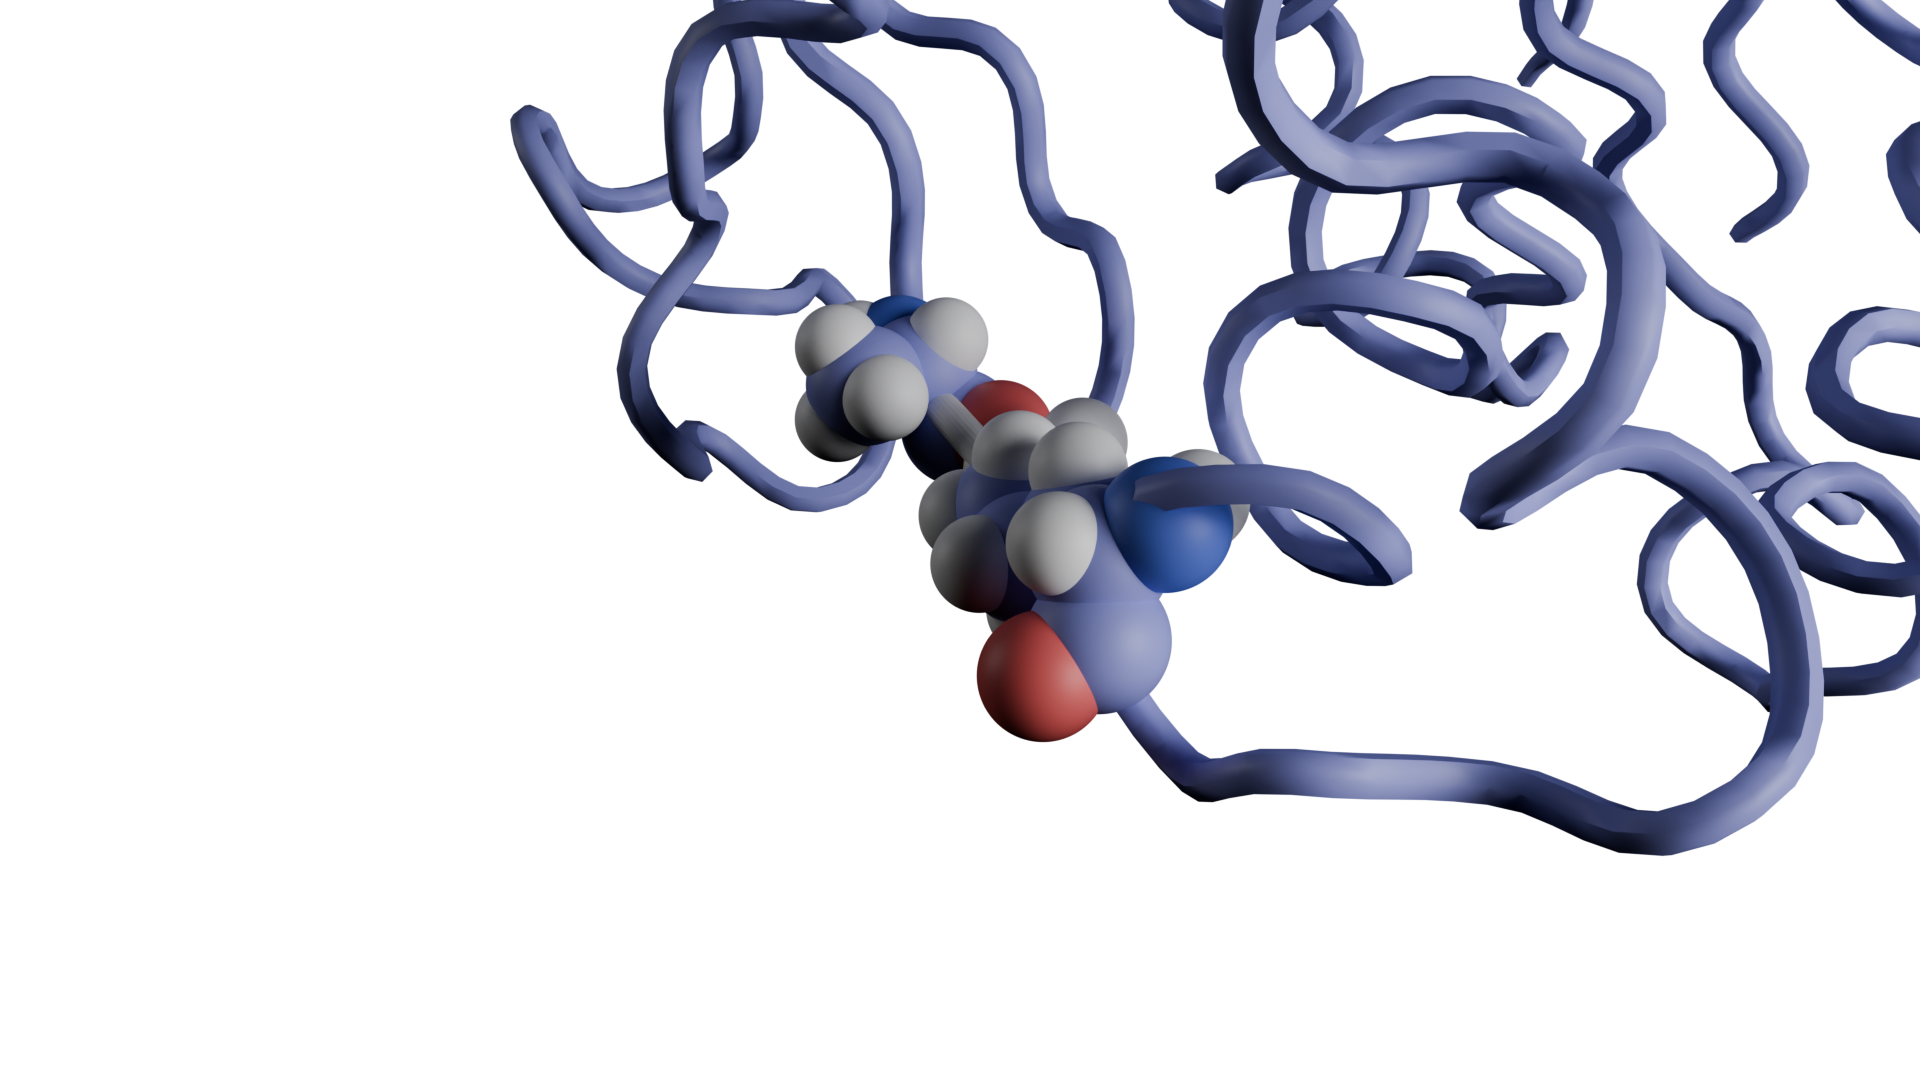

In [12]:
line_mol.render()

# Analysis Visualization

In [15]:
rmsd = RMSD(u.select_atoms('name CA'))
rmsd.run()

In [16]:
vis = rmsd.visualize()

Loading existing instance


Saved: '/var/folders/fn/_k4nj2nd6zv85t7_r3417nb40000gn/T/tmpn19hsbwd.png'
Time: 00:06.60 (Saving: 00:00.13)



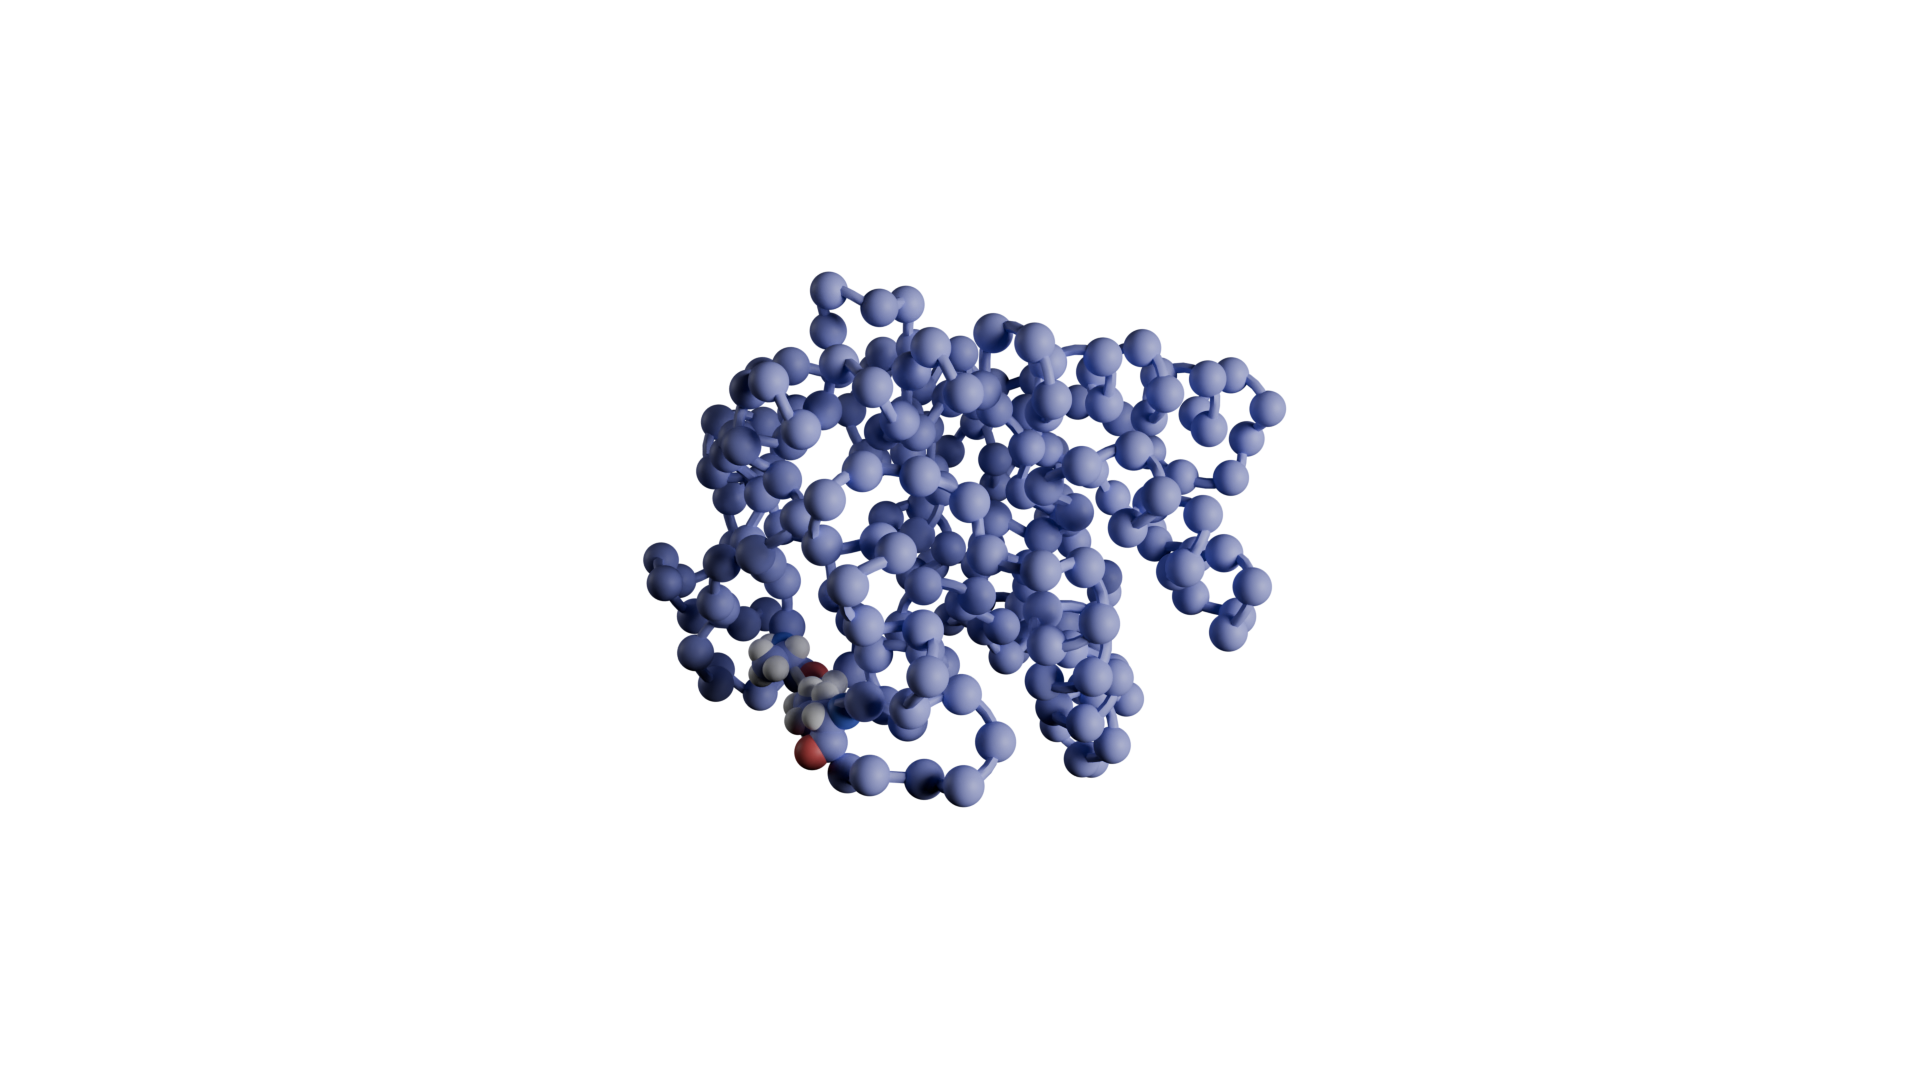

: 

In [17]:
vis.render()